# downloading data form github  repo

In [3]:
from pydriller import Repository

repo_url = "spring-framework"
# see the dictionery of the commit
'''for commit in Repository(repo_url).traverse_commits():
    print(dir(commit))   
    break'''
   


'for commit in Repository(repo_url).traverse_commits():\n    print(dir(commit))   \n    break'

In [4]:
# to download repo wirte in the terminal git clone "github link"

In [5]:
import csv
'''
with open("fixed_file.csv", "w", newline="", encoding="utf-8") as f:
    df = csv.writer(f)
    df.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])  

    for commit in Repository(repo_url).traverse_commits():
        if "fix" in commit.msg.lower():
            for m in commit.modified_files:
                if m.filename.endswith(".java"):
                    df.writerow([
                        commit.hash,
                        commit.msg,
                        m.change_type.name,
                        m.source_code_before, 
                        m.source_code 
                    ])
'''                    




'\nwith open("fixed_file.csv", "w", newline="", encoding="utf-8") as f:\n    df = csv.writer(f)\n    df.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])  \n\n    for commit in Repository(repo_url).traverse_commits():\n        if "fix" in commit.msg.lower():\n            for m in commit.modified_files:\n                if m.filename.endswith(".java"):\n                    df.writerow([\n                        commit.hash,\n                        commit.msg,\n                        m.change_type.name,\n                        m.source_code_before, \n                        m.source_code \n                    ])\n'

### function to download commits from repo

In [6]:
import os
def extract_fixes(repo_path, output_file="fixed_file.csv"):
  
    file_exists = os.path.isfile(output_file)

    with open(output_file, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        if not file_exists:
            writer.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])
        
        for commit in Repository(repo_path).traverse_commits():
            if "fix" in commit.msg.lower():
                for m in commit.modified_files:
                    if m.filename.endswith(".java"): #just java files with fix commits
                        writer.writerow([
                            commit.hash,
                            commit.msg,
                            m.change_type.name,
                            m.source_code_before or "",
                            m.source_code or ""
                        ])



In [7]:
#extract_fixes("defects4j")

In [8]:
#extract_fixes("accumulo")

In [9]:
#extract_fixes("camel")

In [10]:
#extract_fixes("ISSRE2023-BugSeverityPrediction")

In [11]:
#extract_fixes("wicket")

In [12]:
#extract_fixes("jackrabbit-oak")

In [13]:
#extract_fixes("maven")

# clean the data

In [14]:
import pandas as pd  
df=pd.read_csv("fixed_file.csv")
df

,Hash,Message,Type,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
1,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,ADD,NaN,package org.springframework.http.client;\n\nim...
2,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
4,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
...,...,...,...,...,...
26757,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26758,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26759,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26760,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...


### remove the messages from the code

In [15]:
import re
def remove_comments(code):
    if not isinstance(code, str): 
        return code
    code=re.sub(r'/\*.*?\*/', '', code, flags=re.DOTALL)  
    code=re.sub(r'//.*', '', code) 
    return code.strip()


In [16]:
import re

def remove_imports(code):
    if not isinstance(code, str): 
        return code
    cleaned =[]
    for line in code.splitlines():
        if not line.strip().startswith(("import", "package")):
            cleaned.append(line)
    return "\n".join(cleaned)


In [17]:
df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_comments)

C:\Users\hp\AppData\Local\Temp\ipykernel_16368\2932069089.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_comments)


In [18]:
df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_imports)

C:\Users\hp\AppData\Local\Temp\ipykernel_16368\2902052467.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_imports)


In [19]:
print(df["New_Code"].iloc[0])





class JdkClientHttpRequest extends AbstractStreamingClientHttpRequest {

	private static final OutputStreamPublisher.ByteMapper<ByteBuffer> BYTE_MAPPER = new ByteBufferMapper();

	private static final Set<String> DISALLOWED_HEADERS = disallowedHeaders();


	private final HttpClient httpClient;

	private final HttpMethod method;

	private final URI uri;

	private final Executor executor;

	@Nullable
	private final Duration timeout;


	public JdkClientHttpRequest(HttpClient httpClient, URI uri, HttpMethod method, Executor executor,
			@Nullable Duration readTimeout) {

		this.httpClient = httpClient;
		this.uri = uri;
		this.method = method;
		this.executor = executor;
		this.timeout = readTimeout;
	}


	@Override
	public HttpMethod getMethod() {
		return this.method;
	}

	@Override
	public URI getURI() {
		return this.uri;
	}


	@Override
	@SuppressWarnings("NullAway")
	protected ClientHttpResponse executeInternal(HttpHeaders headers, @Nullable Body body) throws IOException {
		Comp

In [20]:
print(df["Type"].unique())

['MODIFY' 'ADD' 'RENAME' 'DELETE']


In [21]:
a=['MODIFY', 'ADD', 'RENAME', 'DELETE']
for t in a:
    print(f"{t}: {len(df[df['Type'] == t])}")


MODIFY: 24066
ADD: 1695
RENAME: 615
DELETE: 386


### take the only row that have modify in the type

In [22]:
df=df[df["Type"]=="MODIFY"]


In [23]:
df=df.reset_index(drop=True)
df

,Hash,Message,Type,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,MODIFY,\n\n\n\nclass JdkClientHttpRequest extends Abs...,\n\n\n\nclass JdkClientHttpRequest extends Abs...
1,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,MODIFY,\n\n\n\n\n\nclass JdkClientHttpRequestTests {\...,\n\n\n\n\n\nclass JdkClientHttpRequestTests {\...
2,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
4,81b4020fc6392025e5e55b2d26b7cd5bac1ca7fe,Do not load concrete types in annotation metad...,MODIFY,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
...,...,...,...,...,...
24061,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,\n\n\n\n\npublic class ToolboxTool implements ...,\n\n\n\n\npublic class ToolboxTool implements ...
24062,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,\n\n\n\npublic class ToolboxToolTest {\n @T...,\n\n\n\npublic class ToolboxToolTest {\n pr...
24063,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,"\n\n\n\n@SuppressWarnings({""unused"", ""checksty...","\n\n\n\n@SuppressWarnings({""unused"", ""checksty..."
24064,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,\n\n\n\npublic class RepositorySystemSupplier ...,\n\n\n\npublic class RepositorySystemSupplier ...


In [24]:
df=df.drop('Type', axis=1)
df

,Hash,Message,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,\n\n\n\nclass JdkClientHttpRequest extends Abs...,\n\n\n\nclass JdkClientHttpRequest extends Abs...
1,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,\n\n\n\n\n\nclass JdkClientHttpRequestTests {\...,\n\n\n\n\n\nclass JdkClientHttpRequestTests {\...
2,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
4,81b4020fc6392025e5e55b2d26b7cd5bac1ca7fe,Do not load concrete types in annotation metad...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
...,...,...,...,...
24061,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,\n\n\n\n\npublic class ToolboxTool implements ...,\n\n\n\n\npublic class ToolboxTool implements ...
24062,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,\n\n\n\npublic class ToolboxToolTest {\n @T...,\n\n\n\npublic class ToolboxToolTest {\n pr...
24063,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,"\n\n\n\n@SuppressWarnings({""unused"", ""checksty...","\n\n\n\n@SuppressWarnings({""unused"", ""checksty..."
24064,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,\n\n\n\npublic class RepositorySystemSupplier ...,\n\n\n\npublic class RepositorySystemSupplier ...


In [25]:
print(df['Message'].iloc[2])

Fix annotation arrays support in ClassFile metadata

As of gh-33616, Spring now supports metadata reading with the ClassFile
API on JDK 24+ runtimes. This commit fixes a bug where
`ArrayStoreException` were thrown when reading annotation attribute
values for arrays.

Fixes gh-35252


In [26]:
keywords = ['bug', 'error', 'issue', 'fault', 'fail', 'exception']
for word in keywords:
    print(df["Message"].str.contains(word, case=False).sum())

2544
3513
2959
1031
1105
1116


In [27]:
df.columns

Index(['Hash', 'Message', 'Old_Code', 'New_Code'], dtype='object')

### search for the lines that have error, bugs,fault,fail,exception or isssue in their message 

In [28]:
df_target=pd.DataFrame(columns=['Hash', 'Message', 'Old_Code', 'New_Code'])
for word in keywords:
    df_sub=df[df["Message"].str.contains(word,case=False)]
    df_target=pd.concat([df_target,df_sub],ignore_index=True)
df_target    

,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
2,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,\n\n\n\n\npublic final class JettyDataBuffer i...,\n\n\n\n\npublic final class JettyDataBuffer i...
3,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,\n\n\n\n\npublic class JettyDataBufferTests {\...,\n\n\n\n\npublic class JettyDataBufferTests {\...
4,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,\n\n\n\n\nclass JettyCoreServerHttpRequest ext...,\n\n\n\n\nclass JettyCoreServerHttpRequest ext...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingReques...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingResult...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\npublic interface ProjectDependenciesResolv...,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter..."
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,\n\n\n\npublic class SmartProjectComparator {\...,\n\n\n\npublic class SmartProjectComparator {\...


In [29]:
print(df_target["Message"].iloc[12267])

Fix recursive update issue in SmartProjectComparator (#10997)

Fixes #10995

The SmartProjectComparator.getProjectWeight() method was using
ConcurrentHashMap.computeIfAbsent() in a recursive context, which
could lead to IllegalStateException: Recursive update when calculating
project weights in complex dependency graphs or concurrent scenarios.

Changes:
- Replace computeIfAbsent() with explicit get() + putIfAbsent() pattern
- Eliminate recursive calls to computeIfAbsent() that violate
  ConcurrentHashMap's internal constraints
- Maintain thread safety using putIfAbsent() for concurrent access
- Add comprehensive test case to verify the fix under concurrent load

The fix preserves all existing functionality while eliminating the
recursive update exception that could occur during parallel builds
of large multi-module projects.


In [30]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12268 entries, 0 to 12267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hash      12268 non-null  object
 1   Message   12268 non-null  object
 2   Old_Code  12267 non-null  object
 3   New_Code  12268 non-null  object
dtypes: object(4)
memory usage: 383.5+ KB


In [31]:
print(df_target.iloc[1])

Hash                 2b7f88ee449fb37c81f2e3649beaa643f9537357
Message     Fix annotation arrays support in ClassFile met...
Old_Code    \n\n\n\n\n\npublic abstract class AbstractAnno...
New_Code    \n\n\n\n\n\npublic abstract class AbstractAnno...
Name: 1, dtype: object


In [32]:
df_target[df_target.duplicated(subset=['Old_Code', 'New_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
67,48e1cc0c1c3ac7c9d8689f743b7d2093d08a0bcd,ACCUMULO-422 Fixed two bugs caused by tserver ...,\n\n\n\n\n\npublic class BulkImport extends Ma...,\n\n\n\n\n\npublic class BulkImport extends Ma...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingReques...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingResult...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\npublic interface ProjectDependenciesResolv...,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter..."
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,\n\n\n\npublic class SmartProjectComparator {\...,\n\n\n\npublic class SmartProjectComparator {\...


In [33]:
df_target[df_target.duplicated(subset=['New_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
67,48e1cc0c1c3ac7c9d8689f743b7d2093d08a0bcd,ACCUMULO-422 Fixed two bugs caused by tserver ...,\n\n\n\n\n\npublic class BulkImport extends Ma...,\n\n\n\n\n\npublic class BulkImport extends Ma...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingReques...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingResult...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\npublic interface ProjectDependenciesResolv...,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter..."
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,\n\n\n\npublic class SmartProjectComparator {\...,\n\n\n\npublic class SmartProjectComparator {\...


In [34]:
df_target[df_target.duplicated(subset=['Old_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\nabstract class ClassFileAnnotation...,\n\n\n\n\n\nabstract class ClassFileAnnotation...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,\n\n\n\n\n\npublic abstract class AbstractAnno...,\n\n\n\n\n\npublic abstract class AbstractAnno...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,\n\n\n\npublic class Formatter implements JUni...,\n\n\n\npublic class Formatter implements JUni...
10,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\n\npublic interface ScannerBase extends I...,\n\n\n\npublic interface ScannerBase extends I...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingReques...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\n\n\npublic interface ProjectBuildingResult...,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i..."
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,\n\npublic interface ProjectDependenciesResolv...,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter..."
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,\n\n\n\npublic class SmartProjectComparator {\...,\n\n\n\npublic class SmartProjectComparator {\...


### search for the row that have the same old and new code

In [35]:
df_false=df_target[df_target['Old_Code']==df_target["New_Code"]]
print(len(df_false))
df_false

2167


,Hash,Message,Old_Code,New_Code
10,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\n\npublic interface ScannerBase extends I...,\n\n\n\npublic interface ScannerBase extends I...
12,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\npublic class ScannerOptions implements S...,\n\n\npublic class ScannerOptions implements S...
13,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\n\n\npublic abstract class InputFormatBas...,\n\n\n\n\npublic abstract class InputFormatBas...
16,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\npublic class FamilyIntersectingIterator ...,\n\n\npublic class FamilyIntersectingIterator ...
17,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,\n\n\n\npublic class FilteringIterator extends...,\n\n\n\npublic class FilteringIterator extends...
...,...,...,...,...
12075,d98b1842d5e5fa842f2aa21119adbdd4080cdc3d,Fix minor typos\n\nFix various minor typos in ...,\n\n\n\n\n\npublic class DerivedItMojo\n ex...,\n\n\n\n\n\npublic class DerivedItMojo\n ex...
12076,d98b1842d5e5fa842f2aa21119adbdd4080cdc3d,Fix minor typos\n\nFix various minor typos in ...,\n\n\n\n\n\npublic class DumpVersionMojo\n ...,\n\n\n\n\n\npublic class DumpVersionMojo\n ...
12188,bcd5d9c9f9ef87bb103dcabb24be62c7128d2fff,DI improvements (#1717)\n\n* Code cleanup\r\n*...,\n\n\n\n@Scope\n@Documented\n@Retention(RUNTIM...,\n\n\n\n@Scope\n@Documented\n@Retention(RUNTIM...
12189,bcd5d9c9f9ef87bb103dcabb24be62c7128d2fff,DI improvements (#1717)\n\n* Code cleanup\r\n*...,\n\n\n\n@Scope\n@Documented\n@Retention(RUNTIM...,\n\n\n\n@Scope\n@Documented\n@Retention(RUNTIM...


### delete the row that have the same old and new code

In [36]:
df_target=df_target[df_target['Old_Code']!=df_target['New_Code']]
df_target=df_target.dropna()
df_target.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10100 entries, 0 to 12267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hash      10100 non-null  object
 1   Message   10100 non-null  object
 2   Old_Code  10100 non-null  object
 3   New_Code  10100 non-null  object
dtypes: object(4)
memory usage: 394.5+ KB


In [37]:
print(df_target["Old_Code"].iloc[0])







abstract class ClassFileAnnotationMetadata {

	static MergedAnnotations createMergedAnnotations(String className, RuntimeVisibleAnnotationsAttribute annotationAttribute, @Nullable ClassLoader classLoader) {
		Set<MergedAnnotation<?>> annotations = annotationAttribute.annotations()
				.stream()
				.map(ann -> createMergedAnnotation(className, ann, classLoader))
				.filter(Objects::nonNull)
				.collect(Collectors.toSet());
		return MergedAnnotations.of(annotations);
	}

	@SuppressWarnings("unchecked")
	private static <A extends java.lang.annotation.Annotation> @Nullable MergedAnnotation<A> createMergedAnnotation(String className, Annotation annotation, @Nullable ClassLoader classLoader) {
		String typeName = fromTypeDescriptor(annotation.className().stringValue());
		if (AnnotationFilter.PLAIN.matches(typeName)) {
			return null;
		}
		Map<String, Object> attributes = new LinkedHashMap<>(4);
		try {
			for (AnnotationElement element : annotation.elements()) {
				Object annotat

### function to compare old and new code

In [38]:
import difflib
def compare_code(old_code, new_code):
    old_lines=str(old_code).splitlines()
    new_lines=str(new_code).splitlines()
    bug_line=[]
    fix_line=[]
    diff=difflib.unified_diff(
        old_lines, new_lines,
    )
    for line in diff:
        if line.startswith("- "):
            bug_line.append(line[2:])
        elif line.startswith("+ "):
            fix_line.append(line[2:])
    df_line=pd.DataFrame(
        [(line,1) for line in bug_line]+
        [(line,0) for line in fix_line],
        columns=["code","label"]
    )
    return df_line


In [39]:
print(compare_code(df_target["Old_Code"].iloc[1],df_target["New_Code"].iloc[1]))

Empty DataFrame
Columns: [code, label]
Index: []


In [40]:
print(df_target["Old_Code"].iloc[1])







public abstract class AbstractAnnotationMetadataTests {

	protected abstract AnnotationMetadata get(Class<?> source);

	@Nested
	class TypeTests {

		@Test
		void classEquals() {
			AnnotationMetadata testClass1 = get(TestClass.class);
			AnnotationMetadata testClass2 = get(TestClass.class);

			assertThat(testClass1).isEqualTo(testClass1);
			assertThat(testClass2).isEqualTo(testClass2);
			assertThat(testClass1).isEqualTo(testClass2);
			assertThat(testClass2).isEqualTo(testClass1);
		}

		@Test
		void memberClassEquals() {
			AnnotationMetadata testMemberClass1 = get(TestMemberClass.class);
			AnnotationMetadata testMemberClass2 = get(TestMemberClass.class);

			assertThat(testMemberClass1).isEqualTo(testMemberClass1);
			assertThat(testMemberClass2).isEqualTo(testMemberClass2);
			assertThat(testMemberClass1).isEqualTo(testMemberClass2);
			assertThat(testMemberClass2).isEqualTo(testMemberClass1);
		}

		@Test
		void classHashCode() {
			AnnotationMetadata testClass1 = get(Te

In [41]:
def generate_dataset(df_target):
    all_dfs=[]
    for _, row in df_target.iterrows():
        diff_df=compare_code(row["Old_Code"], row["New_Code"])
        if not diff_df.empty:
            all_dfs.append(diff_df)
    return pd.concat(all_dfs, ignore_index=True)

In [42]:
print(df_target.columns)

Index(['Hash', 'Message', 'Old_Code', 'New_Code'], dtype='object')


In [43]:
data=generate_dataset(df_target)

In [44]:
data

,code,label
0,BatchWriter bw = conn.createBatchWriter...,1
1,},1
2,},1
3,BatchWriter bw = null;,0
4,bw = conn.createBatchWriter(Constants.M...,0
...,...,...
170683,executor.shutdown();,0
170684,if (exception.get() != null) {,0
170685,throw exception.get();,0
170686,},0


In [45]:
print(data[data["label"]==1].count())

code     80987
label    80987
dtype: int64


In [46]:
data = data[data["code"].str.strip().str.len()> 1]
data


,code,label
0,BatchWriter bw = conn.createBatchWriter...,1
3,BatchWriter bw = null;,0
4,bw = conn.createBatchWriter(Constants.M...,0
5,"ColumnFQ.fetch(scanner, Constants.METAD...",0
6,String maxLogicalTime = null;,0
...,...,...
170680,});,0
170682,"latch.await(30, TimeUnit.SECONDS);",0
170683,executor.shutdown();,0
170684,if (exception.get() != null) {,0


In [47]:
data=data.reset_index()

In [48]:
print(data[data["label"]==1].count())
print(data[data["label"]==0].count())

index    61693
code     61693
label    61693
dtype: int64
index    69014
code     69014
label    69014
dtype: int64


In [49]:
df_bug=pd.DataFrame(columns=["AfterFix"])
df_bug["AfterFix"] = df_target["Message"].str.extract(r'(?i)fix[:\s]*(.*)')
df_bug

,AfterFix
0,annotation arrays support in ClassFile metadata
1,annotation arrays support in ClassFile metadata
2,Jetty DataBufferFactory memory leak
3,Jetty DataBufferFactory memory leak
4,Jetty DataBufferFactory memory leak
...,...
12263,es apache/maven#10984
12264,es apache/maven#10984
12265,es apache/maven#10984
12266,recursive update issue in SmartProjectComparat...


In [50]:
df_bug=df_bug.reset_index()

In [51]:
df_target["Message"].iloc[100]

'ACCUMULO-991 Removed ability to configure transport in proxy.  Also made unit test use different protocols and found/fixed some bugs as a result.\n\ngit-svn-id: https://svn.apache.org/repos/asf/accumulo/trunk@1440939 13f79535-47bb-0310-9956-ffa450edef68'

In [52]:
df_target=df_target.reset_index(drop=True)

In [53]:
count=df_bug["AfterFix"].str.contains("apache/maven#10984", na=False).sum()
print(count)


28


In [54]:
print(df_bug["AfterFix"].nunique())

1829


### split the data

In [55]:
new=pd.DataFrame(columns=["code","bugy"])
new["code"]=df_target["New_Code"]
new["bugy"]=0
new

,code,bugy
0,\n\n\n\n\n\nabstract class ClassFileAnnotation...,0
1,\n\n\n\n\n\npublic abstract class AbstractAnno...,0
2,\n\n\n\n\npublic final class JettyDataBuffer i...,0
3,\n\n\n\n\npublic class JettyDataBufferTests {\...,0
4,\n\n\n\n\nclass JettyCoreServerHttpRequest ext...,0
...,...,...
10095,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i...",0
10096,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i...",0
10097,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter...",0
10098,\n\n\n\npublic class SmartProjectComparator {\...,0


In [56]:
old=pd.DataFrame(columns=["code","bugy"])
old["code"]=df_target["Old_Code"]
old["bugy"]=1
old

,code,bugy
0,\n\n\n\n\n\nabstract class ClassFileAnnotation...,1
1,\n\n\n\n\n\npublic abstract class AbstractAnno...,1
2,\n\n\n\n\npublic final class JettyDataBuffer i...,1
3,\n\n\n\n\npublic class JettyDataBufferTests {\...,1
4,\n\n\n\n\nclass JettyCoreServerHttpRequest ext...,1
...,...,...
10095,\n\n\n\npublic interface ProjectBuildingReques...,1
10096,\n\n\n\npublic interface ProjectBuildingResult...,1
10097,\n\npublic interface ProjectDependenciesResolv...,1
10098,\n\n\n\npublic class SmartProjectComparator {\...,1


In [57]:
my_df=pd.concat([old,new],ignore_index=True)
my_df

,code,bugy
0,\n\n\n\n\n\nabstract class ClassFileAnnotation...,1
1,\n\n\n\n\n\npublic abstract class AbstractAnno...,1
2,\n\n\n\n\npublic final class JettyDataBuffer i...,1
3,\n\n\n\n\npublic class JettyDataBufferTests {\...,1
4,\n\n\n\n\nclass JettyCoreServerHttpRequest ext...,1
...,...,...
20195,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i...",0
20196,"\n\n\n\n@Deprecated(since = ""4.0.0"")\npublic i...",0
20197,"\n\n@Deprecated(since = ""4.0.0"")\npublic inter...",0
20198,\n\n\n\npublic class SmartProjectComparator {\...,0


In [58]:
my_df=my_df.sample(frac=1).reset_index(drop=True)
my_df

,code,bugy
0,\n\n\n\n\n\npublic class DefaultTypeConverter ...,1
1,\n\n\npublic class DefaultTraceFormatter imple...,1
2,\n\n\n\n\n\npublic class RedeliveryPolicy exte...,0
3,\n\n\n\n\n\npublic class ContinuousVerify exte...,0
4,\n\n\n\npublic abstract class SimpleLanguageSu...,0
...,...,...
20195,\n\n\n\npublic class CallbackHandlerImpl imple...,1
20196,"\n\n\n\n@XmlRootElement(name = ""policy"")\n@Xml...",1
20197,\n\n\npublic class FileConsumerExcludeNameTest...,0
20198,\n\n\npublic class PrintScanTimeHistogram {\n ...,0


In [59]:
x=data["code"]
y=data["label"]

In [60]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 130707 entries, 0 to 130706
Series name: code
Non-Null Count   Dtype 
--------------   ----- 
130707 non-null  object
dtypes: object(1)
memory usage: 1021.3+ KB


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,silhouette_score,classification_report,f1_score,confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

### building tfidf and logistique regression piplines and testing it

In [133]:
pip1=Pipeline([
    ("tfidf",(TfidfVectorizer())),
    ("clf",(LogisticRegression(max_iter=100)))
    ])
pip1.fit(x_train,y_train)
y_proba=pip1.predict_proba(x_test)[:,1]  
y_pred1=(y_proba>=0.52).astype(int) 
print("classification_report:", classification_report(y_pred1,y_test))
print("accuracy_score:", accuracy_score(y_pred1,y_test))
print(f1_score(y_test,y_pred1,average="macro"))

classification_report:               precision    recall  f1-score   support

           0       0.81      0.65      0.72     17271
           1       0.51      0.71      0.59      8871

    accuracy                           0.67     26142
   macro avg       0.66      0.68      0.66     26142
weighted avg       0.71      0.67      0.68     26142

accuracy_score: 0.6709509601407696
0.6588067594997715


In [100]:
import matplotlib.pyplot as plt  
import seaborn as sns

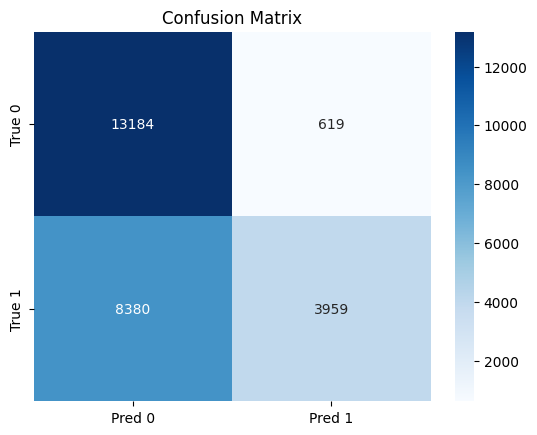

[[13184   619]
 [ 8380  3959]]


In [126]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["True 0","True 1"])
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [135]:
test_code='''
public class HelloWorld {
    public static void main(String[] args) {
        system.out.println("Hello, World!");
    }
}
'''
h=pip1.predict_proba([test_code])
re=(y_proba>=0.55).astype(int) 
print(re)



[0 0 0 ... 0 0 0]


In [104]:
pip2=Pipeline([
    ("tfidf",(TfidfVectorizer())),
    ("clf",(RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=-1)))
    ])
pip2.fit(x_train,y_train)
y_pred2=pip2.predict(x_test)
print("classification_report:", classification_report(y_pred2,y_test))
print("accuracy_score:", accuracy_score(y_pred2,y_test))
print(f1_score(y_pred2,y_test,average="macro"))

classification_report:               precision    recall  f1-score   support

           0       0.98      0.57      0.72     23648
           1       0.18      0.88      0.30      2494

    accuracy                           0.60     26142
   macro avg       0.58      0.73      0.51     26142
weighted avg       0.90      0.60      0.68     26142

accuracy_score: 0.60068089664142
0.5087469127933945


In [105]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip2.predict([test_code]))
print(pip2.predict_proba([test_code]))

<class 'str'>
[0]
[[0.53089864 0.46910136]]


In [106]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip2.predict([test_code]))
print(pip2.predict_proba([test_code]))


<class 'str'>
[0]
[[0.53089864 0.46910136]]


In [107]:
print(confusion_matrix(y_test,y_pred2))

[[13506   297]
 [10142  2197]]


In [108]:
from xgboost import XGBClassifier

In [109]:
tfidf = TfidfVectorizer(
    analyzer="char",         
    ngram_range=(1, 5),      
    min_df=3,               
    max_df=0.9               
)
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb=XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)
pip3=Pipeline([
    ("tfidf", tfidf),
    ("clf", xgb)
])
pip3.fit(x_train, y_train)
y_proba=pip3.predict_proba(x_test)[:, 1]
threshold = 0.4
y_pred4 = (y_proba > threshold).astype(int)
print("classification_report:\n", classification_report(y_test, y_pred4))
print("accuracy_score:", accuracy_score(y_test, y_pred4))
print("macro_f1_score:", f1_score(y_test, y_pred4, average="macro"))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


classification_report:
               precision    recall  f1-score   support

           0       0.90      0.12      0.22     13803
           1       0.50      0.99      0.66     12339

    accuracy                           0.53     26142
   macro avg       0.70      0.55      0.44     26142
weighted avg       0.71      0.53      0.43     26142

accuracy_score: 0.5296457807359805
macro_f1_score: 0.4397440324070751


In [136]:
for t in [0.4, 0.5, 0.55, 0.6]:
    y_pred = (y_proba > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred, digits=3))
    print("Macro F1:", f1_score(y_test, y_pred, average="macro"))



Threshold: 0.4
              precision    recall  f1-score   support

           0      0.732     0.505     0.598     13803
           1      0.589     0.794     0.676     12339

    accuracy                          0.641     26142
   macro avg      0.661     0.649     0.637     26142
weighted avg      0.665     0.641     0.635     26142

Macro F1: 0.636792965720209

Threshold: 0.5
              precision    recall  f1-score   support

           0      0.657     0.780     0.713     13803
           1      0.689     0.545     0.608     12339

    accuracy                          0.669     26142
   macro avg      0.673     0.662     0.661     26142
weighted avg      0.672     0.669     0.664     26142

Macro F1: 0.6608353989258946

Threshold: 0.55
              precision    recall  f1-score   support

           0      0.642     0.860     0.735     13803
           1      0.747     0.463     0.572     12339

    accuracy                          0.672     26142
   macro avg      0.69

#### the best is 0.5

In [141]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
    .out.println("Hello, World!");
    }
}
'''
print(type(test_code))
h=pip3.predict_proba([test_code])
re=(y_proba>=0.55).astype(int)
print(re)




<class 'str'>
[0 0 0 ... 0 0 0]


In [112]:
test_code = '''public class EpochExample {
    public static void main(String[] args) {
        int dataSize = 10;   
        int batchSize = 2;   
        int epochs = 3;     

        
        for (int epoch = 1; epoch <= epochs; epoch++) {
            System.out.println("Epoch " + epoch + "/" + epochs);

            
            for (int i = 0; i < dataSize; i += batchSize) {
                int end = Math.min(i + batchSize, dataSize);
                System.("  Processing batch: " + (i+1) + " to " + end);
            }
        }
    }
}
'''
print(type(test_code))
print(pip3.predict([test_code]))
print(pip3.predict_proba([test_code]))

<class 'str'>
[0]
[[0.603557   0.39644298]]


### building cnn model

In [74]:
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [162]:
from tensorflow.keras import initializers, regularizers, constraints,layers,models

default_args={ "kernel_initializer": initializers.GlorotUniform(), "bias_initializer": "zeros", "kernel_regularizer": None, "bias_regularizer": None, "activity_regularizer": None, "kernel_constraint": None, "bias_constraint": None } 
model=models.Sequential([ layers.Conv1D(32, 3, activation=None, input_shape=(100, 1), **default_args), layers.Conv1D(64, 3, activation=None, **default_args), layers.Flatten(), layers.Dense(128, activation=None, **default_args), layers.Dense(1, activation="sigmoid", **default_args) ])



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=10000)   
tokenizer.fit_on_texts(x_train)           
sequences=tokenizer.texts_to_sequences(x_train)
X=pad_sequences(sequences, maxlen=100)



In [77]:
import numpy as np

In [114]:
YTest=np.array(y_test)
YTrain=np.array(y_train)

In [115]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [163]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)


In [164]:
model.fit(X, YTrain, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.5115 - loss: 2.8270 - val_accuracy: 0.5321 - val_loss: 0.7141
Epoch 2/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.5227 - loss: 0.7030 - val_accuracy: 0.5198 - val_loss: 0.6917
Epoch 3/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.5177 - loss: 0.6999 - val_accuracy: 0.5130 - val_loss: 0.6951
Epoch 4/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.5169 - loss: 0.7088 - val_accuracy: 0.5100 - val_loss: 0.7063
Epoch 5/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.5199 - loss: 0.7017 - val_accuracy: 0.5225 - val_loss: 0.6919
Epoch 6/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.5197 - loss: 0.7008 - val_accuracy: 0.5174 - val_loss: 0.6962
Epoch 7/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5218 - loss: 0.6949 - val_accuracy: 0.5111 - val_loss: 0.6929
Epoch 8/10
2615/2615 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.5218 -

In [165]:
tokenizer.fit_on_texts(x_test)           
sequences=tokenizer.texts_to_sequences(x_test)
XTEST=pad_sequences(sequences, maxlen=100)  
result=y_pred=(model.predict(XTEST) > 0.5).astype("int32")


817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [166]:
result=np.array(result)
result

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(26142, 1), dtype=int32)

In [167]:
print(accuracy_score(y_test,result))

0.5239461403106113


In [168]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68     13803
           1       0.46      0.04      0.08     12339

    accuracy                           0.52     26142
   macro avg       0.49      0.50      0.38     26142
weighted avg       0.49      0.52      0.40     26142



In [169]:
print(f1_score(y_test,result,average='macro'))

0.3799195970968101


In [170]:
print(confusion_matrix(result,y_test))

[[13148 11790]
 [  655   549]]


In [177]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

test_code = '''public class EpochExample {
    public static void main(String[] args) {
        int dataSize = 10;   
        int batchSize = 2;   
        int epochs = 3;     

        
        for (int epoch = 1; epoch <= epochs; epoch++) {
            System.out.println("Epoch " + epoch + "/" + epochs);

            
            for (int i = 0; i < dataSize; i += batchSize) {
                int end = Math.min(i + batchSize, dataSize);
                System.out.println("  Processing batch: " + (i+1) + " to " + end);
            }
        }
    }
}
'''
seq=tokenizer.texts_to_sequences([test_code])
seq_padded=pad_sequences(seq, maxlen=100)
X_test_code = seq_padded.reshape(seq_padded.shape[0], seq_padded.shape[1], 1).astype('float32')
pred_prob=model.predict(X_test_code)
pred_label=(pred_prob < 0.5).astype(int)
print("Probability of bug:", pred_prob)
print("Predicted label (0=no bug, 1=bug):", pred_label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Probability of bug: [[0.5247085]]
Predicted label (0=no bug, 1=bug): [[0]]


In [178]:
hello_code='''
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, world!");
    }
}
'''
seq=tokenizer.texts_to_sequences([hello_code])
seq_padded=pad_sequences(seq,maxlen=100)
hello_code=seq_padded.reshape(seq_padded.shape[0],seq_padded.shape[1],1).astype('float32')
pred_prob=model.predict(hello_code)
pred_label=(pred_prob < 0.5).astype(int)
print("Probability of bug:", pred_prob)
print("Predicted label (0=no bug, 1=bug):", pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Probability of bug: [[0.54442805]]
Predicted label (0=no bug, 1=bug): [[0]]


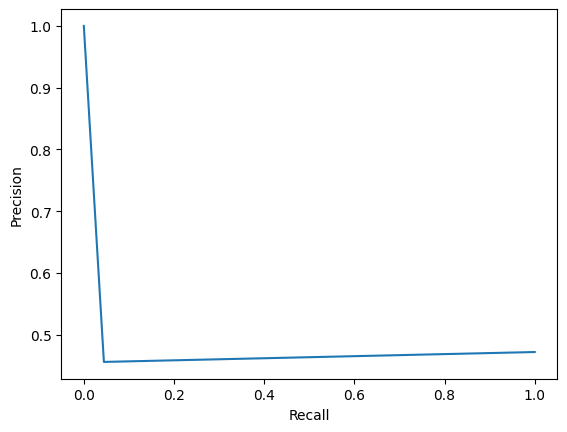

In [174]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, result)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [91]:
#model.save("model.h5")

In [183]:
hello_code='''
public class HelloWorld {
    public static void main(String[] args) {
        println("Hello, world!");
    }
}
'''
seq=tokenizer.texts_to_sequences([hello_code])
seq_padded=pad_sequences(seq,maxlen=100)
hello_code=seq_padded.reshape(seq_padded.shape[0],seq_padded.shape[1],1).astype('float32')
pred_prob=model.predict(hello_code)
pred_label=(pred_prob < 0.5).astype(int)
print("Probability of bug:", pred_prob)
print("Predicted label (0=no bug, 1=bug):", pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Probability of bug: [[0.4853661]]
Predicted label (0=no bug, 1=bug): [[1]]
